## Project 3



## Problem Statement

Recently, the customer service team from Honda has feedback that they are handling a lot of irrelevant enquires pertaining to the rival car company Mazda as Maza just launched the year end promotional sales. This has caused an unnecessary workload on the team. As a data analyst, I am tasked to resolve the work load issue of the customer service team and revamp the workflow process.  I am proposing to design a system whereby  it can segregrate the relevant posts from the irrelevant posts from Mazda so that customer service team can focus on legitimate queries and achieve the desired service level agreement. Primarily, I will be using Natural Language Processing as well as Classification Modeling for this system.

## Data Cleaning 

In [459]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import text 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import re
import nltk
from collections import Counter
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from bs4 import BeautifulSoup
import string

In [460]:
data1= pd.read_csv("datasets/honda.csv")

C:\Users\Yiang Yuet Meng\AppData\Local\Temp\ipykernel_1344\2188127050.py:1: DtypeWarning: Columns (9,20,80,81,83) have mixed types. Specify dtype option on import or set low_memory=False.
  data1= pd.read_csv("datasets/honda.csv")


In [461]:
data1.head()


,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,...,media_embed,secure_media,secure_media_embed,author_flair_background_color,author_cakeday,poll_data,link_flair_template_id,link_flair_text,edited,banned_by
0,0,[],False,violetlad,NaN,[],NaN,text,t2_4w81dd1l,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,bjocknero,NaN,[],NaN,text,t2_kbmvr,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,PLAV0,NaN,[],NaN,text,t2_4ehx3eab,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,carlosxchairez,NaN,[],NaN,text,t2_lt7uxxj,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,Intelligent_Degree42,NaN,[],NaN,text,t2_9gclt704,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove submission that is deleted from the Reddit

In [462]:
data1=data1[(data1['selftext']!='[deleted]')]

Re-examine the data having null seltext 

In [463]:
data_temp=data1[(data1['selftext'].isnull())]
print(data_temp.loc[:,'selftext':'post_hint'])

      selftext  send_replies  spoiler  stickied subreddit subreddit_id  \
2          NaN          True    False     False     Honda     t5_2qwwd   
3          NaN          True    False     False     Honda     t5_2qwwd   
4          NaN          True    False     False     Honda     t5_2qwwd   
5          NaN          True    False     False     Honda     t5_2qwwd   
6          NaN          True    False     False     Honda     t5_2qwwd   
...        ...           ...      ...       ...       ...          ...   
26688      NaN          True    False     False     Honda     t5_2qwwd   
26689      NaN          True    False     False     Honda     t5_2qwwd   
26690      NaN         False    False     False     Honda     t5_2qwwd   
26692      NaN          True    False     False     Honda     t5_2qwwd   
26693      NaN          True    False     False     Honda     t5_2qwwd   

       subreddit_subscribers subreddit_type  \
2                     127202         public   
3                

Based on above display, it is confirmed that those records without selftext is mostly images or video. Thus, I will recommend to delete the rows with null selftext

In [464]:
data1.dropna(subset=['selftext'],inplace=True)

C:\Users\Yiang Yuet Meng\AppData\Local\Temp\ipykernel_1344\214216628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.dropna(subset=['selftext'],inplace=True)


In [465]:
data1['selftext'].isnull().sum()

0

I have confirmed that all the null selftext has been removed from the dataset

In [466]:
data2=pd.read_csv("datasets/mazda.csv")

C:\Users\Yiang Yuet Meng\AppData\Local\Temp\ipykernel_1344\1764501101.py:1: DtypeWarning: Columns (1,2,5,7,9,10,11,12,13,14,18,20,21,22,23,24,25,27,29,30,31,32,33,34,38,40,41,42,47,48,49,53,59,62,63,69,70,71,72,73,74,75,76,78,79,82,83,85,86,87,88,89,90,91,92,93,100,101) have mixed types. Specify dtype option on import or set low_memory=False.
  data2=pd.read_csv("datasets/mazda.csv")


In [467]:
data2=data2[(data2['selftext']!='[deleted]')]

In [468]:
data2.dropna(subset=['selftext'],inplace=True)

In [469]:
data2['selftext'].isnull().sum()

0

In [470]:
df1=data1[['selftext','title','subreddit']]
print(df1.isnull().sum())

selftext     0
title        0
subreddit    0
dtype: int64


In [471]:
df2=data2[['selftext','title','subreddit']]
print(df2.isnull().sum())

selftext     0
title        0
subreddit    0
dtype: int64


After I extracted 2 sets of related datasets, I concatenate the datasets as well as merged the "title" and "selftext" to a field "message". Following that, I exported the combined dataset to a combined.csv to reconfirm all the information is ok.

In [472]:
df=pd.concat([df1, df2])
df.head(10)
df['message']=df['title']+df['selftext']
df.drop_duplicates(inplace=True)
df.to_csv("datasets/combined.csv")

I performed a one hot-encoding of the "subreddit" by converting the categorical data variables so they can be provided to machine learning algorithms to improve predictions

In [473]:
# Create label column
df['label'] = df['subreddit'].map({'Honda':1,'mazda':0})
df.head()
                                   

,selftext,title,subreddit,message,label
0,I recently got my license in October and my pa...,2018 or 2022 civic?,Honda,2018 or 2022 civic?I recently got my license i...,1
1,Is the first service always going to be servic...,11th Gen Maintenance Minder,Honda,11th Gen Maintenance MinderIs the first servic...,1
8,Need advice .\n New to buying a car . I drove ...,Honda CRV XL,Honda,Honda CRV XLNeed advice .\n New to buying a ca...,1
12,I’m in the market for a new car and I know for...,2022 Honda Accord sport 1.5t or 2022 Honda Civ...,Honda,2022 Honda Accord sport 1.5t or 2022 Honda Civ...,1
14,Please delete if against the rules!\n\nForgive...,Advice on handling leased car issues,Honda,Advice on handling leased car issuesPlease del...,1


In [474]:
df['label'].value_counts()

0    15549
1     8441
Name: label, dtype: int64

In [475]:
X = df['message']
y = df['label']

- I can checking the distribution of the outcome variable

In [476]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

#### Lemmatizing
When we "lemmatize" data, we take words and attempt to return their lemma, or the base/dictionary form of a word.

In [477]:
lemmatizer = WordNetLemmatizer()

In [478]:
# Lemmatize tokens.
df['message']=df['message'].str.lower()
tokens_input=df['message']
df['message'] = df.apply(lambda row: lemmatizer.lemmatize(row['message']), axis=1)
tokens_lem=df['message']
df.head()

# Compare tokens to lemmatized version.
list(zip(tokens_input, tokens_lem))

[('2018 or 2022 civic?i recently got my license in october and my parents “gave” me their 2018 honda civic lx. i just drive it to school and get to use it whenever, so even though its not “mine” i’m the one driving it 80% of the timei love that car. when the new 2022 civics came out i hated the look of them. i still prefer the old look tbh. my parents were looking to trade in our suv for a hybrid with the price of gas going up and the salesman convinced them to trade in both cars for a new 2022 civic sport and an accord hybrid. i will be driving the new civic which is fine and i got to pick the colour and everything but i feel like im going to regret it and miss my current car. am i just being stubborn like is a 2022 civic sport genuinely a better car than a 2018 lx',
  '2018 or 2022 civic?i recently got my license in october and my parents “gave” me their 2018 honda civic lx. i just drive it to school and get to use it whenever, so even though its not “mine” i’m the one driving it 80%

From the output, 

In [479]:
# Convert &amp;, &gt; and &lt; XML character entity references back to &, > and <
from xml.sax.saxutils import unescape
df['message'] = df['message'].apply(unescape)

In [480]:
X = df['message']
y = df['label']

## EDA

#### Removing Stop Words/Tokenizing / Removing Special Characters

When we "tokenize" data, we take it and split it up into distinct chunks based on some pattern. I also convert all the words into lower case.

In [481]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [482]:
my_additional_stop_words = frozenset(["Honda", "honda","mazda","hondas","mazda2","mazda3","mazda3i","mazda3s","mazda5",
                                     "mazda6","mazda6s","mazdaconnect","mazdarati","mazdaconnect","mazdaspeed","mazdaspeed3",
                                      "mazdaspeed6","mazdatweaks","mazdausa","hondalink","hondas","hondata","hondavert",
                                      "mazdas"])

In [483]:
stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

In [484]:
pattern=r'\w*\S'



In [485]:
cvec = CountVectorizer(max_features=1000, min_df=2, stop_words=stop_words,token_pattern=pattern)
tfidf = TfidfVectorizer(max_features=1000, stop_words=stop_words, token_pattern=pattern)

In [486]:
# Fit the vectorizer on our corpus.
cvec.fit(X_train)

CountVectorizer(max_features=1000, min_df=2,
                stop_words=frozenset({'Honda', 'a', 'about', 'above', 'across',
                                      'after', 'afterwards', 'again', 'against',
                                      'all', 'almost', 'alone', 'along',
                                      'already', 'also', 'although', 'always',
                                      'am', 'among', 'amongst', 'amoungst',
                                      'amount', 'an', 'and', 'another', 'any',
                                      'anyhow', 'anyone', 'anything', 'anyway', ...}),
                token_pattern='\\w*\\S')

In [487]:
# Transform the corpus.
X_train_cvec = cvec.transform(X_train)

In [488]:
X_test_cvec = cvec.transform(X_test)

Text(0, 0.5, 'Word')

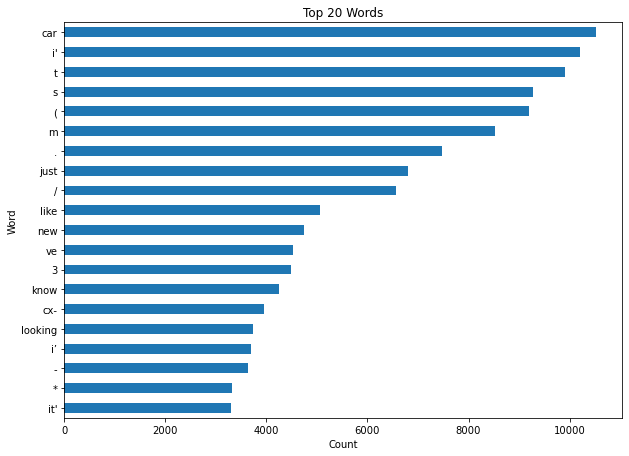

In [489]:
words_cvec_pf=pd.DataFrame(X_train_cvec.todense(), 
                          columns=cvec.get_feature_names_out())
word_cvec_counts_pf = words_cvec_pf.sum(axis=0)

plt.figure(figsize=(22,16), facecolor='white')
plt.subplot(2,2,1)
word_cvec_counts_pf.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 Words')
plt.xlabel('Count')
plt.ylabel('Word')


As shown above, there are a lot of words that are due to short form or special characters.
Thus, I create below function to clean up the words

In [490]:
def soupclean(text):
    cleaned = []
    #p_stemmer = PorterStemmer()
    for t in text:
        # Using BeautifulSoup to remove HTLM features
        textblock1 = BeautifulSoup(t).get_text()

        # Removing numerical values
        textblock1 = re.sub('[^a-zA-Z]'," ",textblock1)

        # Set the block to lower case
        textblock1 = textblock1.lower()

        # Remove HTML special entities (e.g. &amp;)
        textblock1 = re.sub(r'\&\w*;', '', textblock1)
    
        # Remove hyperlinks
        textblock1 = re.sub(r'https?:\/\/.*\/\w*', '', textblock1)
    
        # Remove punctuation and split 's, 't, 've with a space for filter
        textblock1 = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ',  textblock1)

        #Remove specialcharacter
        textblock1=re.sub(r"[,.;@#?!&$]+", ' ', textblock1) 
        
        # Remove words with 2 or fewer letters
        textblock1 = re.sub(r'\b\w{1,3}\b', '',  textblock1)
    
        # Remove whitespace (including new line characters)
        textblock1 = re.sub(r'\s\s+', ' ', textblock1)
    
       # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
        textblock1 = ''.join(c for c in textblock1 if c <= '\uFFFF') 
        
        # Recreate the textblock
        cleaned.append(textblock1)
    
    print(len(textblock1),'posts were cleaned.')
    return cleaned


In [491]:
X = soupclean(X)



C:\Anaconda3\envs\dsi1\lib\site-packages\bs4\__init__.py:431: MarkupResemblesLocatorWarning: "https://www.instagram.com/p/cvevlgvlf1a/?utm_medium=copy_linkhttps://www.instagram.com/p/cvevlgvlf1a/?utm_medium=copy_link" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Anaconda3\envs\dsi1\lib\site-packages\bs4\__init__.py:431: MarkupResemblesLocatorWarning: "https://www.xing.com/profile/jaro_mares[removed]" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Anaconda3\envs\dsi1\lib\site-packages\bs4\__init__.py:431: MarkupResemblesLocatorWarning: "https://youtu.be/c4s5c9lkxp4[removed]" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client li

443 posts were cleaned.


In [492]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [493]:
my_additional_stop_words = frozenset(["Honda", "honda","mazda","hondas","mazda2","mazda3","mazda3i","mazda3s","mazda5",
                                     "mazda6","mazda6s","mazdaconnect","mazdarati","mazdaconnect","mazdaspeed","mazdaspeed3",
                                      "mazdaspeed6","mazdatweaks","mazdausa","hondalink","hondas","hondata","hondavert",
                                      "mazdas","ve","cs","s","t","m","don","i'","(","/",".","","*","-","$",'it"',"car","3","5","6",
                                      "https:","com/","don'","it.","?","i'm","civic","accord","integra","vtec","civics","odyssey",
                                     "accords","miata","skyactiv","corksport","protege"])

stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

Text(0, 0.5, 'Word')

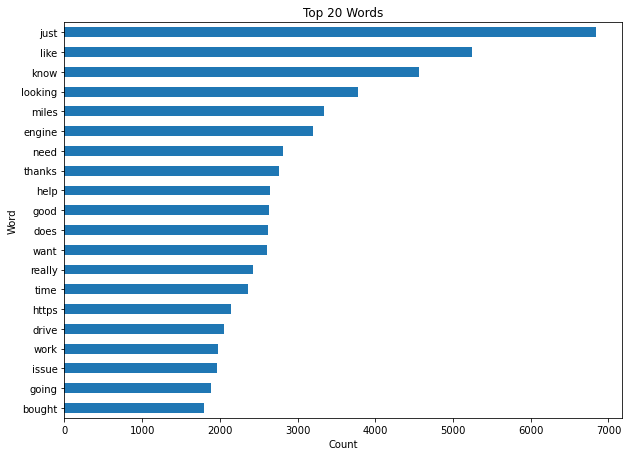

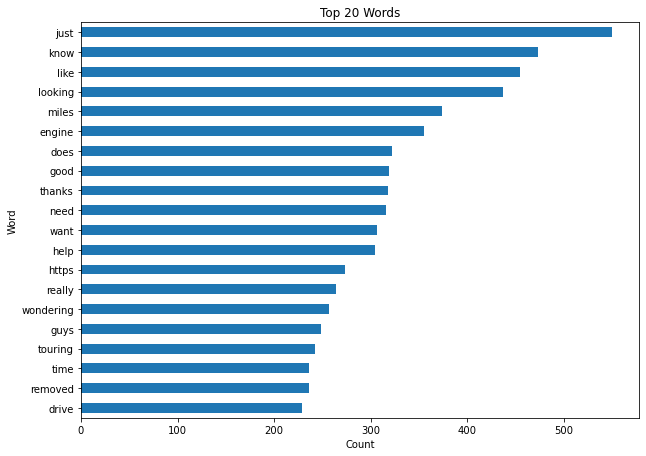

In [494]:
cvec = CountVectorizer(max_features=1000, min_df=2, stop_words=stop_words,token_pattern=pattern)
tfidf = TfidfVectorizer(max_features=1000, stop_words=stop_words, token_pattern=pattern)
cvec.fit(X_train)
X_train_cvec = cvec.transform(X_train)
X_test_cvec = cvec.transform(X_test)
words_cvec_pf=pd.DataFrame(X_train_cvec.todense(), 
                          columns=cvec.get_feature_names_out())
word_cvec_counts_pf = words_cvec_pf.sum(axis=0)

plt.figure(figsize=(22,16), facecolor='white')
plt.subplot(2,2,1)
word_cvec_counts_pf.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 Words')
plt.xlabel('Count')
plt.ylabel('Word')
# Fit the vectorizer on our corpus.
tfidf.fit(X_train)
# Transform the corpus.
X_train_tfidf= tfidf.transform(X_train)
_test_tfidf = tfidf.transform(X_test)
words_tfidf_pf=pd.DataFrame(X_train_tfidf.todense(), 
                          columns=tfidf.get_feature_names_out())
word_tfidf_counts_pf = words_tfidf_pf.sum(axis=0)
plt.figure(figsize=(22,16), facecolor='white')
plt.subplot(2,2,2)
word_tfidf_counts_pf.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 Words')
plt.xlabel('Count')
plt.ylabel('Word')


The invalids characters or words are removed from the text

In [495]:
features=cvec.get_feature_names_out()
features

array(['able', 'absolutely', 'acceleration', 'access', 'accessories',
       'accident', 'according', 'actual', 'actually', 'acura', 'added',
       'adding', 'additional', 'advance', 'advice', 'afford',
       'aftermarket', 'ahead', 'alarm', 'alternator', 'amazing', 'amazon',
       'android', 'annoying', 'answer', 'anybody', 'anymore', 'anyways',
       'apart', 'apparently', 'appears', 'apple', 'appreciate',
       'appreciated', 'area', 'aren', 'asked', 'asking', 'assembly',
       'assist', 'assume', 'assuming', 'audio', 'auto', 'automatic',
       'available', 'average', 'avoid', 'aware', 'away', 'awesome',
       'backup', 'barely', 'base', 'based', 'basic', 'basically',
       'battery', 'believe', 'belt', 'best', 'better', 'bigger', 'black',
       'blind', 'block', 'blown', 'blue', 'bluetooth', 'body', 'bolt',
       'bolts', 'boost', 'bose', 'bought', 'brake', 'brakes', 'braking',
       'brand', 'brands', 'break', 'bring', 'broke', 'broken', 'brought',
       'budget', 'bu

## Modelling

In [496]:
# Redefine training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [497]:
# Check what we need to check in a classification problem.
y.value_counts(normalize = True)

0    0.648145
1    0.351855
Name: label, dtype: float64

Above value counts exhibit a large imbalance in the distribution of the target classes. There is several times more negative samples than postive samples. In this case, it is recommended to use stratified sampling to ensure that relative class frequencies is approximately preserved in each train and validation fold.

In [499]:
# Fit and predict a multinomial naive Bayes classifier 
mnb_model = Pipeline([
    ('cvec', CountVectorizer(stop_words= stop_words, token_pattern=pattern)),
    ('nb', MultinomialNB())
])

cv_scores = cross_val_score(mnb_model, X_train, y_train, cv=5, scoring='roc_auc')
mnb_model.fit(X_train, y_train)
y_pred = mnb_model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Multinomial naive Bayes classifier')
print('Train score: {}, Test score {}'.format(round(cv_scores.mean(), 4), round(roc_auc_score(y_test, y_pred), 4)))
print('Number of features: {}'.format(len(mnb_model.named_steps.cvec.get_feature_names_out())))
print('Accuracy: {}'.format(round((tp+tn)/(tp+fp+tn+fn),4)))
print('Misclassification rate: {}'.format(round((fp+fn)/(tp+fp+tn+fn),4)))
print('Precision: {}'.format(round(tp/(tp+fp),4)))
print('Recall: {}'.format(round(tp/(tp+fn),4)))
print('Specificity: {}'.format(round(tn/(tn+fp),4)))

Multinomial naive Bayes classifier
Train score: 0.7805, Test score 0.7032
Number of features: 25597
Accuracy: 0.7466
Misclassification rate: 0.2534
Precision: 0.668
Recall: 0.5567
Specificity: 0.8497


The test score for Mutinomial Naive Bayes is 0.7032  The model exhibits overfitting of train scores. I will use this models as the baseline model and explore other parameters and models

In [500]:
# Fit and predict a Random Forrest classifier 
rf_model = Pipeline([
    ('cvec', CountVectorizer(stop_words= stop_words, token_pattern=pattern)),
    ('rf', RandomForestClassifier())
])

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print('Random Forrest classifier')
print('Train score: {}, Test score {}'.format(round(cv_scores.mean(), 4), round(roc_auc_score(y_test, y_pred), 4)))
print('Number of features: {}'.format(len(rf_model.named_steps.cvec.get_feature_names_out())))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Accuracy: {}'.format(round((tp+tn)/(tp+fp+tn+fn),4)))
print('Misclassification rate: {}'.format(round((fp+fn)/(tp+fp+tn+fn),4)))
print('Precision: {}'.format(round(tp/(tp+fp),4)))
print('Recall: {}'.format(round(tp/(tp+fn),4)))
print('Specificity: {}'.format(round(tn/(tn+fp),4)))

Random Forrest classifier
Train score: 0.7656, Test score 0.6567
Number of features: 25597
Accuracy: 0.7447
Misclassification rate: 0.2553
Precision: 0.8092
Recall: 0.3593
Specificity: 0.954


The test score for Random Forrest is 0.6564. The model exhibits overfitting of train scores. I will explore to tune the parameters. 

I will first tune the parameters for Mutinomial Naive Bayes model.

In [502]:
# Explore parameters for vectorizer
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words= stop_words, token_pattern=pattern)),
    ('nb', MultinomialNB())
])

params = dict(
    cvec__min_df=[2,3],
    cvec__max_features=[2000,3000,4000,5000],
    cvec__max_df = (0.5, 0.75, 1.0),
    cvec__ngram_range = [(1, 1), (2, 2)],
    
)

gs = GridSearchCV(pipe, params, cv=5)
gs.fit(X_train, y_train)
print("Multinomial Naive Bayes")
print("Best params: {}".format(gs.best_params_))
print('Train score: {}, Test score {}'.format(round(gs.best_score_, 4), round(gs.best_estimator_.score(X_test, y_test), 4)))
print('Number of features: {}'.format(len(gs.best_estimator_.named_steps.cvec.get_feature_names_out())))
tn, fp, fn, tp = confusion_matrix(y_test, gs.predict(X_test)).ravel()
print('Accuracy: {}'.format(round((tp+tn)/(tp+fp+tn+fn),4)))
print('Misclassification rate: {}'.format(round((fp+fn)/(tp+fp+tn+fn),4)))
print('Precision: {}'.format(round(tp/(tp+fp),4)))
print('Recall: {}'.format(round(tp/(tp+fn),4)))
print('Specificity: {}'.format(round(tn/(tn+fp),4)))

Multinomial Naive Bayes
Best params: {'cvec__max_df': 0.5, 'cvec__max_features': 5000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1)}
Train score: 0.7226, Test score 0.722
Number of features: 5000
Accuracy: 0.722
Misclassification rate: 0.278
Precision: 0.6027
Recall: 0.6159
Specificity: 0.7796


The train score for this model is 0.7226 and test score is 0.722. Best Parameter is cvec__max_df:0.5, cvec__max_features:5000, cvec__min_df:2, cvec__ngram_range:{1,1}. It is overall better than the baseline model. In terms of accuracy, it is slighly more accurate. There is no sign of overfitting of training set in this case. Next step, I am attempting to tune the parameters for Random Forrest Classifier

In [503]:
# Explore parameters for vectorizer
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words= stop_words, token_pattern=pattern)),
    ('rf', RandomForestClassifier())
])

params = dict(
    cvec__min_df=[2,3],
    cvec__max_features=[2000,3000,4000,5000],
    cvec__max_df = (0.5, 0.75, 1.0),
    cvec__ngram_range = [(1, 1), (2, 2)],
    
)

gs = GridSearchCV(pipe, params, cv=5)
gs.fit(X_train, y_train)
print('Random Forrest Classifier')
print("Best params: {}".format(gs.best_params_))
print('Train score: {}, Test score {}'.format(round(gs.best_score_, 4), round(gs.best_estimator_.score(X_test, y_test), 4)))
print('Number of features: {}'.format(len(gs.best_estimator_.named_steps.cvec.get_feature_names_out())))
tn, fp, fn, tp = confusion_matrix(y_test, gs.predict(X_test)).ravel()
print('Accuracy: {}'.format(round((tp+tn)/(tp+fp+tn+fn),4)))
print('Misclassification rate: {}'.format(round((fp+fn)/(tp+fp+tn+fn),4)))
print('Precision: {}'.format(round(tp/(tp+fp),4)))
print('Recall: {}'.format(round(tp/(tp+fn),4)))
print('Specificity: {}'.format(round(tn/(tn+fp),4)))

Random Forrest Classifier
Best params: {'cvec__max_df': 1.0, 'cvec__max_features': 5000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 1)}
Train score: 0.746, Test score 0.7443
Number of features: 5000
Accuracy: 0.7443
Misclassification rate: 0.2557
Precision: 0.7411
Recall: 0.4203
Specificity: 0.9203


The train score for this model is 0.7448 and test score is 0.7467. Best Parameter is cvec__max_df:0.75, cvec__max_features:5000, cvec__min_df:3, cvec__ngram_range:{1,1}. It is overall better than the baseline model. There is no sign of overfitting of training set in this case.
Next step, I am attempting to tune the hyperparamter for Random Forrest Classifier

In [440]:
# Tune hyperparameter for Random Forest Classifier
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words= stop_words, token_pattern=pattern)),
    ('rf', RandomForestClassifier())
])

params = dict(
    rf__n_estimators = [100, 150, 200],
    rf__max_depth= [None, 1, 2, 3, 4, 5],
    cvec__max_features=[4000],
    cvec__min_df=[2],
    cvec__max_df=[1.0],
    cvec__ngram_range=[(1,1)]
)

gs = GridSearchCV(pipe, params, cv=5)
gs.fit(X_train, y_train)
print('Random Forrest Classifier')
print("Best params: {}".format(gs.best_params_))
print('Train score: {}, Test score {}'.format(round(gs.best_score_, 4), round(gs.best_estimator_.score(X_test, y_test), 4)))
print('Number of features: {}'.format(len(gs.best_estimator_.named_steps.cvec.get_feature_names())))

Random Forrest Classifier
Best params: {'cvec__max_df': 1.0, 'cvec__max_features': 4000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1), 'rf__max_depth': None, 'rf__n_estimators': 150}
Train score: 0.7458, Test score 0.7497
Number of features: 4000


C:\Anaconda3\envs\dsi1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


After hyperparameter tuning, both the train score and test score improve.
Train Score is 0.7458 and test score is 0.7497
Best n_estimator= 150, max_depth=None, cvec_max_features=4000, cvec_min_df=2,cvec__max_df=1.0 cvec__ngram_range=(1,1), 


Summary of the model experimented

|Model|Paramters|Train Score|Test Score|Remarks|
|---|---|---|---|---|
|Baseline Model|---|0.7804|0.7032|exhibits overfitting of train scores|
|Model 1|---|---|---|---|
|Random Forrest|---|0.7674|0.6564|exhibits overfitting of train scores|
|Model 2|---|---|---|---|
|Multinomial Naive Bayes|cvec__min_df: 2, cvec__max_df=0.5,  cvec__max_features: 5000, cvec__ngram_range: (1,1)|0.7226|0.722|better than baseline model. no overfitting issue|
|Model 3|---|---|---|---|
|Random Forrest|cvec__min_df: 3, cvec__max_df=0.75,cvec__max_features: 5000, cvec__ngram_range: (1,1)|0.7448|0.7467|better than model 2|
|Model 4|---|---|---|---|
|Random Forrest|cvec__min_df: 2, cvec__max_df=1.0,  cvec__max_features: 4000 cvec__ngram_range: (1,1) rf__n_estimators = 150 rf__max_depth= None|0.7458|0.7497|Better than model 3. Chosen this model for further analysis|


## Evaluation 

In [441]:
# Get predictions
preds = gs.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
# Save confusion matrix values

C:\Anaconda3\envs\dsi1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


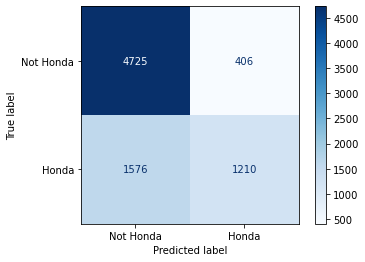

In [442]:
# View confusion matrix
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', values_format='d',display_labels=['Not Honda', 'Honda']);

In [443]:
print('true negative:',tn)
print('false positive:',fp)
print('false negative:', fn)
print('true positive:',tp)


true negative: 4725
false positive: 406
false negative: 1576
true positive: 1210


In [444]:
# Examine some classification metrics 
print('Accuracy: {}'.format(round((tp+tn)/(tp+fp+tn+fn),4)))
print('Misclassification rate: {}'.format(round((fp+fn)/(tp+fp+tn+fn),4)))
print('Precision: {}'.format(round(tp/(tp+fp),4)))
print('Recall: {}'.format(round(tp/(tp+fn),4)))
print('Specificity: {}'.format(round(tn/(tn+fp),4)))

Accuracy: 0.7497
Misclassification rate: 0.2503
Precision: 0.7488
Recall: 0.4343
Specificity: 0.9209


C:\Anaconda3\envs\dsi1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


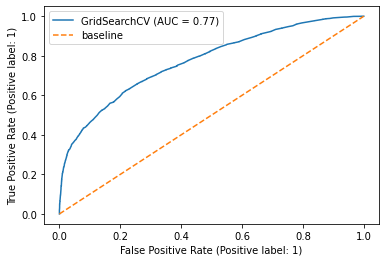

In [445]:
plot_roc_curve(gs, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [458]:
def get_predictions(probabilities, threshold):
    return [0 if prob < threshold else 1 for prob in probabilities]
threshold_list = [0.25, 0.4, 0.5, 0.6, 0.75]

for threshold in threshold_list:
    preds = get_predictions(gs.predict_proba(X_test)[:,1], threshold)
    acc = accuracy_score(y_test, preds)
    print(f'Threshold: {threshold}, Accuracy: {acc}')

Threshold: 0.25, Accuracy: 0.581407098648478
Threshold: 0.4, Accuracy: 0.7284324870531768
Threshold: 0.5, Accuracy: 0.7478842996084375
Threshold: 0.6, Accuracy: 0.7420740179360868
Threshold: 0.75, Accuracy: 0.7006441834028041


In [446]:
f1_score(y_test, preds)

0.5497501135847341

- Our model correctly predicts 74.97% of observations.
- Among posts that our model predicted to be in /r/honda, we have 74.88% of them correctly classified.
- Among posts that are in /r/honda, our model has 43.43% of them correctly classified.
- Among posts that are in /r/mazda, our model has 92.09% of them correctly classified


In [447]:

# Examine incorrectly classified posts
df_pred = pd.DataFrame({
    'X_test': X_test,
    'y_test': y_test,
    'y_pred': y_pred
})

# Posts incorrectly predicted to be in not in r/honda
str1=""


for i in df_pred[(df_pred.y_test - df_pred.y_pred) > 0]['X_test']:
    print(i)
    print('-'*20)
    str1= str1 + i

suggestions honda accord stereo radio replacementhi having issues with stock radio navigation honda accord looking replace wondering folks here have good luck with aftermarket replacements looking clean swap 
--------------------
honda financialhas anyone ever went through totaling process with long story short crushed trees totaled course insurance sent check payoff vehicle currently because loan still report need proof that payed insurance anyone know much more downtime should prepare 
--------------------
 wheels tires opinionhey spec honda integra type base model have yokohama advan wheels that want them however stock wheels running tires meanwhile advan wheels tires other wider tires asked opinions some that safe especially wide tires back meanwhile some that should wide ones front will perfectly fine some mentioned will need spacers would work anyone similar experience with running these similar wheels tires safe really like wheels want sell them 
--------------------
 honda civi

 honda longer plays music from iphonei have play music plug your iphone into used since iphones have headphone jack have iphone mini whenever plug phone says song matter what anyone experience this just last week would play music fine
--------------------
 civic sport touring accord looking first which should choose civic sport touring hatchback accord foot tall parents will stay with months more year guys think difference worth able pick please help 
--------------------
 accord sport apple play issuesso this issue over year when using apple carplay display either constantly disconnects from phone just freezes entire display unit just restarts itself seemed random seems almost every time sure just super disappointing
--------------------
tips replacing inner tire rods civic door auto first bought myself suspension terrible shape started project tonight with replacing tire rods control arms struts joints forgot name started front holy hell buddy could inner tire rods everybody says nee

--------------------
 honda ignition soundis just that sound really distinctive years could hear engine start honda right about time gearhead anything accord swear that sound distinctive 
--------------------
 dynamic gravel rally coilovers honda civic yellow speed racinganyone experience with these thinking running these primarily camping vehicle light rallycross backcountry roads thinking running pillow ball front hardened rubber back front inverted rears spring rates thinking front back reduce understeer just cause likes understeer bump steer main concern will rest suspension components handle inch lift above stock which these coils give 
--------------------
 left dealershipi purchased civic hatchback about week returning from trip when started hear some clicking rattling sounds popped hood first time engine covered just sitting engine refill quarts advice what this situation already sent email outlining situation salesperson planning call dealership service department friday 
----

In [448]:
from collections import Counter

def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]

fullwordlist= re.split('\s+', str1)
fullwordlist = removeStopwords(fullwordlist,stop_words)

Counter(fullwordlist).most_common(30)


[('just', 748),
 ('like', 539),
 ('know', 483),
 ('miles', 379),
 ('looking', 361),
 ('engine', 308),
 ('good', 304),
 ('want', 302),
 ('need', 295),
 ('help', 294),
 ('https', 281),
 ('thanks', 267),
 ('time', 254),
 ('does', 254),
 ('drive', 252),
 ('going', 237),
 ('really', 236),
 ('issue', 231),
 ('work', 226),
 ('sport', 221),
 ('dealership', 209),
 ('light', 208),
 ('bought', 203),
 ('think', 199),
 ('driving', 193),
 ('cars', 184),
 ('start', 182),
 ('wondering', 179),
 ('used', 179),
 ('guys', 173)]

Above posts are wrongly classified as NOT r/honda post. Top common words 'just','like','know','looking','miles','want','good','sport'.These words are relatively common among all car brands. So, model is not able to predict it properly.

In [449]:
# Posts incorrectly predicted to be in /r/honda
str2=""
for i in df_pred[(df_pred.y_test - df_pred.y_pred) < 0]['X_test']:
    print(i)
    print('-'*20)
    str2=str2+i

need some advice mazda that start have mazda start clicks time doesn even turn over have replaced starter battery alternator starter relay just wondering anyone other ideas what wrong with 
--------------------
 there catch chiptuning buddy mine talking about chip tuning mazda more horsepower torque more fuel efficient this seems good true because wouldn this factory default there catch 
--------------------
what color code planing fixing some small rust stops however having hard time trying find what color code thought find somewhere itself sadly didin could anyone help figure what name color color code mazda disel 
--------------------
painting rimshi planning paint rims silver part scratching perform that paint spray other ways https preview redd rucc width format pjpg auto webp dbbeef 
--------------------
replacing engine filter tools needed having trouble replacing engine filter after unhitching metal tabs housing still connected plastic tabs that want budge think there obvious s

residual value market with child comparing against pilot highlander jeep grand cherokee toyota honda salesman bashed mazda saying resale value hold like theirs will truth this will since redesign anyone have really like drove pretty well when took entertainment system controls blew toyota honda water tied with jeep grand cherokee moment favorite goes advice appreciated 
--------------------
 guess what happensif company puts little sports everything builds imagine what happens when builds sports view poll https reddit poll 
--------------------
wire harness replacement want install aftermarket radio socket only while radio display connector someone help tell where could maybe find harness socket perhaps switch block just know where these type harness 
--------------------
mazda cars have code with just mazda while decoding code found digit year idenrifier checked other cars showroom found their digit also asked mazda sales showed excel table recently sold cars with their digit code thi

In [450]:
from collections import Counter

def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]

fullwordlist= re.split('\s+', str2)
fullwordlist = removeStopwords(fullwordlist,stop_words)

Counter(fullwordlist).most_common(30)

[('just', 101),
 ('know', 80),
 ('engine', 73),
 ('need', 52),
 ('want', 49),
 ('code', 48),
 ('good', 46),
 ('like', 45),
 ('https', 43),
 ('miles', 43),
 ('does', 43),
 ('transmission', 43),
 ('light', 40),
 ('help', 37),
 ('looking', 37),
 ('time', 36),
 ('start', 35),
 ('think', 35),
 ('work', 33),
 ('manual', 32),
 ('change', 30),
 ('sensor', 29),
 ('swap', 29),
 ('really', 28),
 ('right', 28),
 ('fluid', 27),
 ('wondering', 26),
 ('guys', 26),
 ('exhaust', 26),
 ('replaced', 25)]

Above mazda posts are wrongly classified as r/honda post. Top common words 'just','like','engine','know','miles','hybrid'.The word 'hybrid' is likely the word that the model picks up and identify as honda.

In [451]:
# Examine correctly classified posts under Honda
df_pred = pd.DataFrame({
    'X_test': X_test,
    'y_test': y_test,
    'y_pred': y_pred
})

# Posts predicted to be in /r/honda
str3=""
for i in df_pred[(df_pred.y_test==1) & (df_pred.y_pred==1)]['X_test']:
    print(i)
    print('-'*20)
    str3= str3 + i

overheating issuesmy honda civic with dohc vtec engine been having slight overheating issues replaced water pump thermostat coolant temperature sensor drive about miles going easy temperature gauge quickly rises recently past times antifreeze shot coolant reservoir when overheated pull over side road shut hood check wait minute then start back normal temperature drive least another minutes before overheats again real smart vehicles help would really appreciated thanks 
--------------------
 honda civic hatch manual burnt clutch after milesok need some advice just bought honda civic hatch with manual transmission weeks super pumped about anyways driving today transmission clearly working correctly then stopped working towed dealer told clutch burnt based codes only driven miles thats typo before further here some pieces info that probably forefront your mind this first manual transmission learned drive manual have been driving manuals years promise extremely competent driver last toyota

transmission fluid change when best time change trans fluid civic coupe with about miles wondering timing this based milage years owning driving habits 
--------------------
 honda civic hatchbackrecently civic that been sitting years engine missing some parts anyone know easy engine swap 
--------------------
 generation accord coupehello honda wanted this subreddit should stick with order carvana accord coupe miles should wait version with perhaps lesser miles features that missing from years mainly would like manual transmission understand that actually quite rare find that manual does lack apple carplay which something that like have well leaning towards keeping preorder seeing goes hard find area anyway northern california open feedback this 
--------------------
looking some troubleshooting with series valvetrain have honda sohc with built bottom about miles build been daily vehicle past year great little engine just replaced stock camshaft with skunk stage getting valvetrain cli

 civic reliable hello friend mine gave civic been sitting years because ignition issue where wouldn turn made offer just have already fixed ignition issue replaced battery threw alternator changed coolant installed timing belt water pump tensioner this worth putting money into wanting paint myself with rustoleum method also needs tires probably brake done tell engine smooth cooling system works good transmission little jerky when shifting tell slipping maybe needs drain fill fluid trans motor went after money into vehicle they expensive replace engine reliable thanks 
--------------------
tail lights workingbrake lights working fine tail lights changed bulb checked fuse idea what wrong 
--------------------
 series honda skip this letter alphabet motor designation coming future series series series series series series series series series series series
--------------------
changed dash making visit inspectionwondering anyone dealt with this before during smog guess technician reported

 honda accord does anyone know vcmtuner normal tuner your same time 
--------------------
 insight wantsecu reprogramming that does following when pressed moving engine stays 
--------------------
changing threshold reset maintenance minder last year have driven less than usual been years since last change maintenance minder shows life this crosstour manual advises that service message does appear month following change change annually question reset maintenance minder when doing this unscheduled annual change continue ticking considering this change just sneak type deal concerned throw miss other maintenance items that minder scheduling resetting schedule 
--------------------
 have dilemma another have honda accord cylinder silver with spoiler miles motor overheated days needs transmission sure should spend motor transmission radiator while instead getting newer albeit used dealership monthly payments could another years with this 
--------------------
 cylinder knock sensorso replac

--------------------
 euro accord type winganyone know where guys would happen have 
--------------------
what current sweet spot used hondas which year generation best seek good features value cost ratio interested anything especially model that easy maintain repair replace parts when needed looking find that going through next years coming from having owned civic prelude favorite currently civic 
--------------------
 ridgeline towing capacity when properly equipped what does properly equipped mean specifically ridgeline sport with 
--------------------
slipping transmissionhey guys have acura about dash always been able feel shifts never slipped before started slip gear very specific scenario whenever going hill above below rpms will slip shutter third happened maybe once going into mainly happened going keep mind doesn happen when cooler outside going uphill shifts above rpms just wondering anyone help with this thanks 
--------------------
 honda pilots current owner pilot odyssey

In [452]:
fullwordlist= re.split('\s+', str3)
fullwordlist = removeStopwords(fullwordlist,stop_words)

Counter(fullwordlist).most_common(50)

[('just', 405),
 ('engine', 321),
 ('know', 261),
 ('like', 248),
 ('miles', 211),
 ('coupe', 210),
 ('looking', 207),
 ('help', 195),
 ('need', 183),
 ('want', 172),
 ('good', 166),
 ('type', 162),
 ('swap', 155),
 ('https', 150),
 ('does', 138),
 ('transmission', 133),
 ('acura', 123),
 ('hybrid', 123),
 ('really', 120),
 ('light', 120),
 ('wondering', 119),
 ('time', 118),
 ('bought', 112),
 ('drive', 109),
 ('think', 108),
 ('cars', 106),
 ('work', 106),
 ('change', 102),
 ('going', 101),
 ('battery', 96),
 ('start', 94),
 ('issue', 94),
 ('thanks', 93),
 ('getting', 93),
 ('make', 91),
 ('manual', 90),
 ('sure', 90),
 ('auto', 90),
 ('exhaust', 89),
 ('prelude', 89),
 ('guys', 88),
 ('code', 87),
 ('replaced', 86),
 ('driving', 86),
 ('pilot', 84),
 ('parts', 82),
 ('recently', 81),
 ('years', 80),
 ('power', 77),
 ('stock', 77)]

Above posts are wrongly classified as r/honda post. Top common words 'just','like','know','looking','miles','want','good','sport'.These words are relatively common among all car brands. So, model is not able to predict it properly.

In [453]:


gs.best_estimator_.predict_log_proba(X_test)

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs.best_estimator_.predict_proba(X_test)[:,1]})

pred_df.head()


C:\Anaconda3\envs\dsi1\lib\site-packages\sklearn\ensemble\_forest.py:902: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


,true_values,pred_probs
1135,0,0.186667
34972,0,0.353333
4326,0,0.266667
15380,1,0.526667
8701,0,0.133333


In [454]:
rf_feat = gs.best_estimator_[0].get_feature_names()
rf_feat_imp = gs.best_estimator_[1].feature_importances_

df_rf_feat00 = pd.DataFrame(data=rf_feat_imp, index=rf_feat)

C:\Anaconda3\envs\dsi1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [455]:
df_rf_feat00.sort_values(by=0, ascending=False).head(60)


,0
coupe,0.023005
prelude,0.009517
acura,0.009140
type,0.008629
http,0.008351
hybrid,0.007649
pilot,0.005989
touring,0.005892
swap,0.005755
grand,0.004394


Insights on the topics covered in Honda post
The top important features pertaining to Honda:
- Coupe
- Sports
- Hybrid
- Infotainment
- Miles

Based on above top important features, Honda is synonymous with economical, fuel-efficient automobiles. it’s the classic models, such coupe, that remain the best of the bunch. These two characteristics can deceive one into thinking they’re simple economy cars or another mildly sporty coupe. 
There is also frequent mention of infotainment system. Honda issues a recall for nearly 608,000 vehicles because of instrument panel software problems. The recall affected the 2018-2020 Odyssey, 2019-2020 Passport and 2019-2021 Pilot vehicles with defective instrument panel control modules. So, that explains frequent mention of infotainment in Honda posts.

In [456]:
df_rf_feat00.sort_values(by=0, ascending=False).tail(30)

,0
nearing,4.510850e-06
wipe,4.408880e-06
uploads,4.214528e-06
shuffle,3.983897e-06
entries,3.592094e-06
winners,3.542736e-06
hosted,3.206336e-06
mirroring,3.144257e-06
warn,2.946127e-06
cladding,2.907495e-06


Create a simple input to test the model. I prepare a my_test.csv file whereby I load some test messages. 

In [457]:
# Test entering Honda post

df_test=pd.DataFrame()

df_test=pd.read_csv('datasets/my_test.csv')

pred_df = pd.DataFrame({'message':df_test['message'],'pred_probs': gs.best_estimator_.predict_proba(df_test['message'])[:,1],'expected result':df_test['result']})

pred_df.head()

,message,pred_probs,expected result
0,I recently got my license in October and my pa...,0.613333,1
1,Is the first service always going to be servic...,0.753333,1
2,Anyone here have experience with adding a turb...,0.160000,0
3,what's going on everyone? Hope everyone had a ...,0.120000,0


Based on the prob score, it is shown that the model is working as expected. Pre_prob>0.5 for those rows whereby expected result is 1. The model is able to predict accurately. 

## Conclusions and Recommendation

My Random Forrest classifier performed well with a test accuracy score of 0.7497. This is within expectations because the topics of our two chosen subreddits is closely related. On top of it, the mentioned of brand name is removed from the text.
Subreddit Classifier - A proof of concept web application was developed to demonstrate potential use case. Users can submit their draft post in the application to determine which of the two subreddits should the post be submitted to.

My application can segregate the posts well. This has been further verified with some mock test messages. 

With this, I will seek to further develop the application in our production system.

Scope for future improvements:
- Optimize stop words 
- Try other ensemble models, such as XGBoost Classifier
- Ability for model to classify more than two subreddits